In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix,classification_report
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [ ]:
df=pd.read_csv('df_pretraite.csv')

In [ ]:
# On définit une fonction qui retourne 0 pour un état normal et 1 s'il s'agit d'une attaque
def normal_or_not(state):
    if(state=="normal"):
        return 0
    else:
        return 1

In [ ]:
df['attack-type']=df['attack-type'].apply(normal_or_not)

In [ ]:
df=df[df['protocol_type']==1]

In [ ]:
df.drop(['num_outbound_cmds'],axis=1,inplace=True)

In [ ]:
X=df.drop('attack-type',axis=1).values
y=df['attack-type'].values

<Axes: xlabel='protocol_type', ylabel='count'>

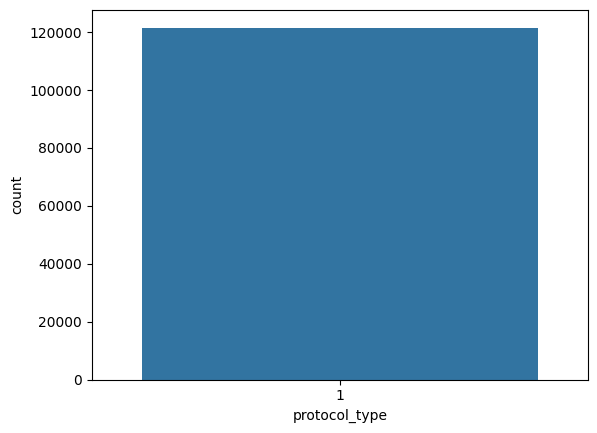

In [ ]:
sns.countplot(x='protocol_type',data=df)

In [ ]:
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
y_test.shape

(24314,)

In [ ]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
log_directory='logs\\fit'
timestamp=datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory=log_directory+'\\'+timestamp
board= TensorBoard(log_dir=log_directory,histogram_freq=1,write_graph=True, write_images=True, update_freq='epoch',profile_batch=2,embeddings_freq=1)

In [ ]:
# tcp
model=Sequential()
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x=X_train,y=y_train,epochs=300, batch_size=256, validation_data=(X_test,y_test),callbacks=[early_stop,board])

Epoch 1/300
380/380 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8588 - loss: 0.3670 - val_accuracy: 0.9588 - val_loss: 0.1159
Epoch 2/300
380/380 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9585 - loss: 0.1292 - val_accuracy: 0.9694 - val_loss: 0.0859
Epoch 3/300
380/380 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9655 - loss: 0.0988 - val_accuracy: 0.9750 - val_loss: 0.0667
Epoch 4/300
380/380 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9709 - loss: 0.0833 - val_accuracy: 0.9833 - val_loss: 0.0567
Epoch 5/300
380/380 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9756 - loss: 0.0703 - val_accuracy: 0.9855 - val_loss: 0.0495
Epoch 6/300
380/380 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9793 - loss: 0.0624 - val_accuracy: 0.9834 - val_loss: 0.0491
Epoch 7/300
380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9819 - loss: 0.0557 - val_accuracy: 0.9861 - val_loss: 0.0435
Epoch 8/300
380/380 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9830 - loss: 0.0538 - val_accu

In [ ]:
losses_tcp=pd.DataFrame(model.history.history)

In [ ]:
epoch_tcp=len(losses_tcp)

<Axes: >

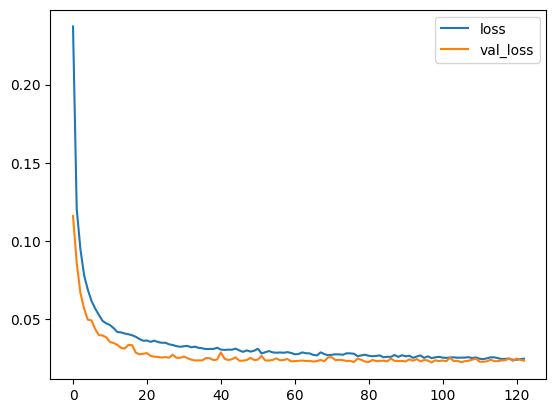

In [ ]:
losses_tcp[['loss','val_loss']].plot()

<Axes: >

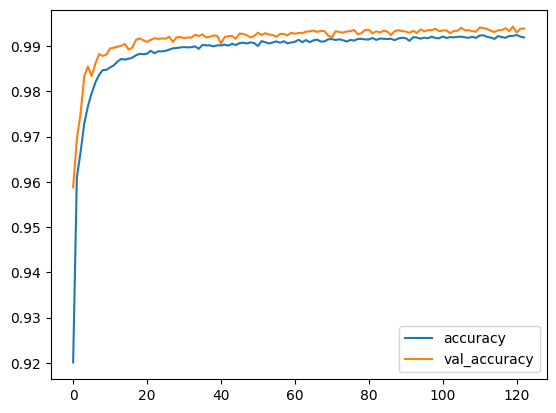

In [ ]:
losses_tcp[['accuracy','val_accuracy']].plot()

In [ ]:
predictions_tcp=(model.predict(X_test)>0.5).astype('int32')

760/760 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(classification_report(y_test,predictions_tcp))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12272
           1       1.00      0.99      0.99     12042

    accuracy                           0.99     24314
   macro avg       0.99      0.99      0.99     24314
weighted avg       0.99      0.99      0.99     24314



In [ ]:
confusion_matrix(y_test,predictions_tcp)

array([[12222,    50],
       [   99, 11943]])

In [ ]:
model.save('MTcp.h5')
model.save('MTcp.keras')


In [ ]:
from joblib import dump

In [ ]:
dump(scaler,'scaler_MTcp.pkl')

['scaler_MTcp.pkl']